In [13]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"TaipeiSansTCBeta-Regular.ttf", size=14)

import warnings
warnings.filterwarnings('ignore')

In [14]:
os.listdir('Dataset')

['台灣電力公司_未來兩年機組大修停機排程_20210516.csv',
 '台灣電力公司_過去電力供需資訊_20210514.csv',
 '過去電力供需資訊_近5年系統概況_20210514.csv']

In [15]:
pw_info = pd.read_csv(os.path.join('.', 'Dataset', '台灣電力公司_過去電力供需資訊_20210514.csv'))
pw_info['日期'] = pd.to_datetime(pw_info['日期'].astype(str))
# pw_info.set_index ('日期', inplace=True)
pw_info.head()

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),...,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,2020-01-01,28125,25335,2790,11.01,301.704,206.750,0,0,98.4,...,26.2,67.3,4.0,1.3,4.0,1.8,0.0,13.3,20.4,0.0
1,2020-01-02,31303,28223,3080,10.91,330.461,226.457,0,0,98.4,...,46.5,79.3,5.0,1.4,3.1,4.0,0.0,20.8,7.5,0.0
2,2020-01-03,31676,28292,3384,11.96,335.832,230.138,0,0,98.4,...,21.3,48.1,4.0,1.3,2.0,4.0,0.0,19.8,12.5,0.0
3,2020-01-04,29219,25583,3636,14.21,312.093,213.870,0,0,98.4,...,28.4,62.6,5.0,1.3,3.0,4.0,0.0,20.5,10.8,0.0
4,2020-01-05,27456,24761,2695,10.88,295.308,202.368,0,0,98.3,...,15.4,66.5,6.0,1.3,3.0,2.2,0.0,18.2,3.1,0.0


In [16]:
pw_info.columns

Index(['日期', '淨尖峰供電能力(MW)', '尖峰負載(MW)', '備轉容量(MW)', '備轉容量率(%)', '工業用電(百萬度)',
       '民生用電(百萬度)', '核一#1(萬瓩)', '核一#2(萬瓩)', '核二#1(萬瓩)', '核二#2(萬瓩)', '核三#1',
       '核三#2', '林口#1', '林口#2', '林口#3', '台中#1', '台中#2', '台中#3', '台中#4', '台中#5',
       '台中#6', '台中#7', '台中#8', '台中#9', '台中#10', '興達#1', '興達#2', '興達#3', '興達#4',
       '大林#1', '大林#2', '和平#1', '和平#2', '麥寮#1', '麥寮#2', '麥寮#3', '汽電共生',
       '大潭 (#1-#6)', '通霄 (#1-#6)', '興達 (#1-#5)', '南部 (#1-#4)', '大林(#5-#6)',
       '海湖 (#1-#2)', '國光 #1', '新桃#1', '星彰#1', '星元#1', '嘉惠#1', '豐德(#1-#2)',
       '協和 (#1-#4)', '氣渦輪', '離島', '德基', '青山', '谷關', '天輪', '馬鞍', '萬大', '大觀',
       '鉅工', '大觀二', '明潭', '碧海', '立霧', '龍澗', '卓蘭', '水里', '其他小水力', '風力發電',
       '太陽能發電'],
      dtype='object')

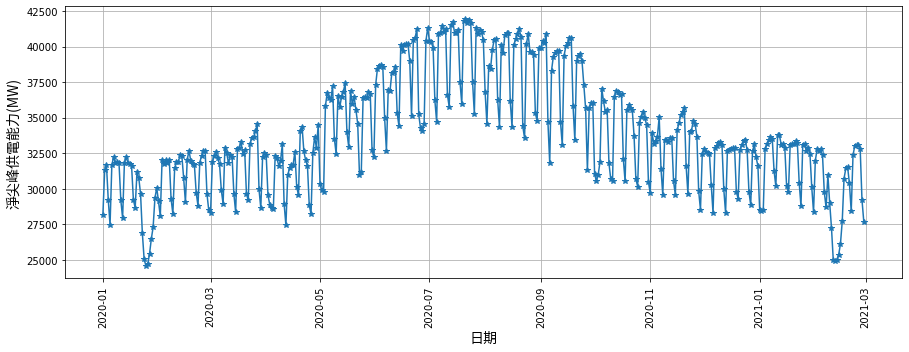

In [17]:
plt.figure(figsize=(15, 5))
plt.plot_date(pw_info['日期'], pw_info['淨尖峰供電能力(MW)'], '*-')
plt.xlabel('日期', FontProperties=font)
plt.xticks(rotation=90)
plt.ylabel('淨尖峰供電能力(MW)', FontProperties=font)
plt.grid()
plt.show()


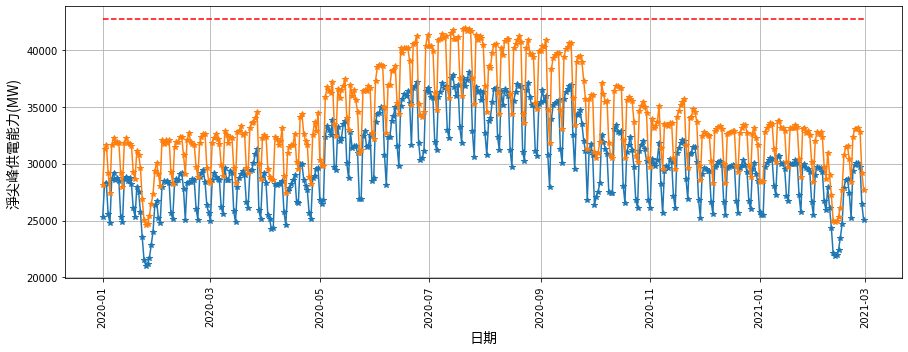

In [18]:
plt.figure(figsize=(15, 5))
plt.plot_date(pw_info['日期'], pw_info['尖峰負載(MW)'], '*-')
plt.plot_date(pw_info['日期'], pw_info['淨尖峰供電能力(MW)'], '*-')
plt.plot(pw_info['日期'], [42730] * pw_info.shape[0], 'r--')
plt.xlabel('日期', FontProperties=font)
plt.xticks(rotation=90)
plt.ylabel('淨尖峰供電能力(MW)', FontProperties=font)
plt.grid()
plt.show()


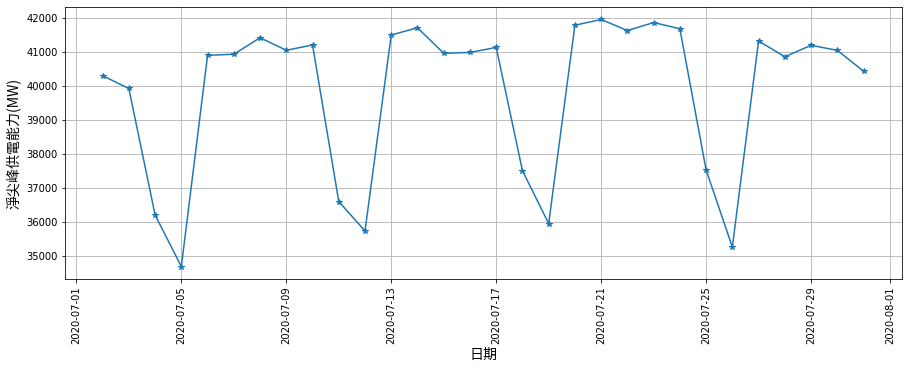

In [19]:
range_condition = ('2020-07-01' < pw_info['日期']) & (pw_info['日期'] < '2020-08-01')
range_pw_info = pw_info.loc[range_condition, :]

plt.figure(figsize=(15, 5))
plt.plot_date(range_pw_info['日期'], range_pw_info['淨尖峰供電能力(MW)'], '*-')
plt.xlabel('日期', FontProperties=font)
plt.xticks(rotation=90)
plt.ylabel('淨尖峰供電能力(MW)', FontProperties=font)
plt.grid()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3362.661, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3440.863, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3439.159, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3433.672, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3438.863, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3361.588, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3361.304, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3342.772, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3329.339, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3326.877, Time=0.60 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3327.142, Time=0.40 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3324.078, Time=0.29 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=3317.732, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : 

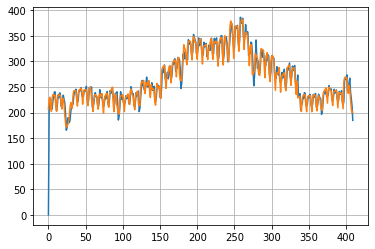

In [42]:
# 來做預測
from pmdarima import auto_arima, model_selection

train, test = model_selection.train_test_split(pw_info['民生用電(百萬度)'], train_size=410)
model = auto_arima(
    train,
    d=1,
    index=test.index,
    error_action='ignore', 
    trace=True,
    suppress_warnings=True, 
    maxiter=10,
    seasonal=False,
    m=7)

# predicted = model.predict(n_periods=test.shape[0])
# predicted = model.predict(n_periods=test.shape[0])
predicted = model.predict_in_sample(train)

# predicted_df = pd.DataFrame(data={'預測': predicted}, index=test.index)
# predicted_df = pd.concat([predicted_df, test], axis=1)
predicted_df = pd.DataFrame(data={'預測': predicted}, index=train.index)
predicted_df = pd.concat([predicted_df, train], axis=1)

plt.figure()
plt.plot(predicted_df)
plt.grid()
